In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
df = pd.read_csv("results/csv_systematic.txt")
df = df[df['CSV_err']<0.1]
#df = df[df['rho_coe']!=1.8][df['rho_coe']!=-1]#[df['PDF_model']=='JAM20']
#print(df['PDF_model'].unique())
df.describe()

,Q2,xbj,xbj_corr,rho_coe,CSV,CSV_err
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,4.712500,0.465000,0.464719,-0.727778,0.014711,0.024950
std,0.604345,0.100887,0.093487,1.317889,0.065242,0.019203
min,4.000000,0.275000,0.287822,-1.800000,-0.242627,0.003589
25%,4.000000,0.375000,0.387709,-1.500000,-0.030034,0.012880
50%,4.750000,0.475000,0.470421,-1.500000,0.015014,0.019938
75%,5.500000,0.537500,0.532629,1.000000,0.064073,0.028527
max,5.500000,0.625000,0.614131,1.800000,0.157690,0.079212


In [2]:
import statistics 
xs_one = df[df['Q2']==4].sort_values('xbj_corr')['xbj_corr'].unique()

CSV_one = []
CSV_one_stat = []
CSV_one_sys = []

for ix in xs_one:
    CSVs = df[df['Q2']==4][df['xbj_corr']==ix]['CSV']
    mean = statistics.mean(CSVs)
    std = statistics.stdev(CSVs)
    CSVs_errs = df[df['Q2']==4][df['xbj_corr']==ix]['CSV_err']
    err_mean = statistics.mean(CSVs_errs)
    #print(mean)
    #print(std)
    CSV_one.append(mean)
    CSV_one_stat.append(err_mean)
    CSV_one_sys.append(std)
print(xs_one)
print(CSV_one)
print(CSV_one_stat)
print(CSV_one_sys)

[0.28782192 0.33444932 0.37382584 0.42002944 0.46941981 0.51694167
 0.56676958]
[-0.026958002140542538, 0.03287816093054649, 0.06077350590649397, 0.06059100313417237, 0.045399547047715164, 0.009573851881902823, -0.008198016769935089]
[0.04837687932542548, 0.023301972554631033, 0.017664115637918712, 0.01694446086718141, 0.019762120590087605, 0.03258449408390359, 0.05955389127416828]
[0.06974773233930014, 0.06841332246460034, 0.0786778036662892, 0.06548785441247734, 0.05480036432124183, 0.04491073165764466, 0.017357022160135075]


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_28464/1888431322.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CSVs = df[df['Q2']==4][df['xbj_corr']==ix]['CSV']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_28464/1888431322.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CSVs_errs = df[df['Q2']==4][df['xbj_corr']==ix]['CSV_err']


In [3]:

def delta_udv(parameter):
    #x = np.arange(0.2,0.7,0.01)
    x = np.linspace(0.2,0.7,50)
    return parameter*(1-x)**4*x**-0.5*(x-0.0909)
#x_axis = np.arange(0.2,0.7,0.01)
x_axis = np.linspace(0.2,0.7,50)
y_delta_uv = delta_udv(-0.2)
y_delta_dv = delta_udv(0.2)
y_delta_uv_up = delta_udv(0.8)
y_delta_uv_low = delta_udv(-0.8)
y_delta_dv_up = delta_udv(-0.65)
y_delta_dv_low = delta_udv(0.65)

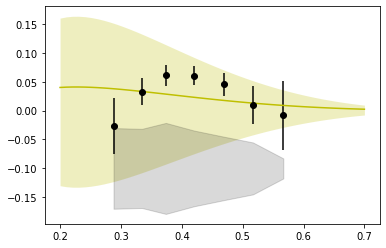

In [4]:
fig, ax = plt.subplots()
ax.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'y',alpha=.25, linewidth=0)
ax.plot(x_axis,y_delta_dv-y_delta_uv,label = 'MRST',color = 'y')

plt.errorbar(xs_one,CSV_one,CSV_one_stat,fmt = 'o',color = 'k')
plt.fill_between(xs_one,-0.1-np.asarray(CSV_one_sys),-0.1+np.asarray(CSV_one_sys),alpha = 0.15,color = 'k')

In [5]:
import statistics 
xs_two = df[df['Q2']==4.75].sort_values('xbj_corr')['xbj_corr'].unique()

CSV_two = []
CSV_two_stat = []
CSV_two_sys = []

for ix in xs_two:
    CSVs = df[df['Q2']==4.75][df['xbj_corr']==ix]['CSV']
    mean = statistics.mean(CSVs)
    std = statistics.stdev(CSVs)
    CSVs_errs = df[df['Q2']==4.75][df['xbj_corr']==ix]['CSV_err']
    err_mean = statistics.mean(CSVs_errs)
    #print(mean)
    #print(std)
    CSV_two.append(mean)
    CSV_two_stat.append(err_mean)
    CSV_two_sys.append(std)
print(xs_two)
print(CSV_two)
print(CSV_two_stat)
print(CSV_two_sys)

[0.339491   0.3861515  0.42582662 0.47142311 0.51930108 0.56819041
 0.61413082]
[-0.11504369842255159, 0.038662615532960215, 0.04852028146336274, 0.052907283679518774, 0.04915891812202681, 0.03020609452852679, -0.036695069820708505]
[0.058113549017002504, 0.021086363103139327, 0.01316502655782451, 0.011228679320554671, 0.012114773181326489, 0.018370545190885466, 0.03483024699251875]
[0.08093480944003661, 0.05705110052038263, 0.056386005684029024, 0.05705270104341463, 0.05280989825456127, 0.04289627968624421, 0.028356089260740156]


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_28464/2448108693.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CSVs = df[df['Q2']==4.75][df['xbj_corr']==ix]['CSV']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_28464/2448108693.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CSVs_errs = df[df['Q2']==4.75][df['xbj_corr']==ix]['CSV_err']


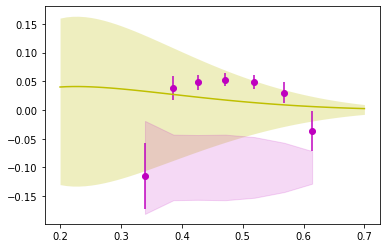

In [6]:
fig, ax = plt.subplots()
ax.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'y',alpha=.25, linewidth=0)
ax.plot(x_axis,y_delta_dv-y_delta_uv,label = 'MRST',color = 'y')

plt.errorbar(xs_two,CSV_two,CSV_two_stat,fmt = 'o',color = 'm')
plt.fill_between(xs_two,-0.1-np.asarray(CSV_two_sys),-0.1+np.asarray(CSV_two_sys),alpha = 0.15,color = 'm')

In [7]:
import statistics 
xs_three = df[df['Q2']==5.5].sort_values('xbj_corr')['xbj_corr'].unique()

CSV_three = []
CSV_three_stat = []
CSV_three_sys = []

for ix in xs_three:
    CSVs = df[df['Q2']==5.5][df['xbj_corr']==ix]['CSV']
    mean = statistics.mean(CSVs)
    std = statistics.stdev(CSVs)
    CSVs_errs = df[df['Q2']==5.5][df['xbj_corr']==ix]['CSV_err']
    err_mean = statistics.mean(CSVs_errs)
    #print(mean)
    #print(std)
    CSV_three.append(mean)
    CSV_three_stat.append(err_mean)
    CSV_three_sys.append(std)
print(xs_three)
print(CSV_three)
print(CSV_three_stat)
print(CSV_three_sys)

[0.38822829 0.43232054 0.47648507 0.52124882 0.56884832 0.61346745]
[0.02577676027485377, -0.004634594094046028, 0.009362238644591379, 0.0399565122401013, 0.011028406638186772, -0.02904250832926559]
[0.04597703199272112, 0.015929327912808416, 0.010705580375442255, 0.010100088957583455, 0.010894348022276694, 0.018294481385701833]
[0.04744782287371499, 0.024946886819680467, 0.023155649567557408, 0.042729465614225644, 0.023495325883433987, 0.008266943879455188]


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_28464/3192017738.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CSVs = df[df['Q2']==5.5][df['xbj_corr']==ix]['CSV']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_28464/3192017738.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CSVs_errs = df[df['Q2']==5.5][df['xbj_corr']==ix]['CSV_err']


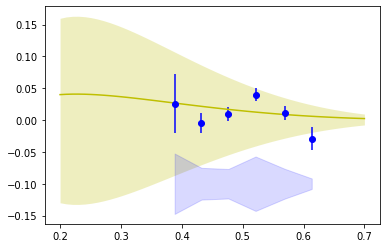

In [8]:
fig, ax = plt.subplots()
ax.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'y',alpha=.25, linewidth=0)
ax.plot(x_axis,y_delta_dv-y_delta_uv,label = 'MRST',color = 'y')

plt.errorbar(xs_three,CSV_three,CSV_three_stat,fmt = 'o',color = 'b')
plt.fill_between(xs_three,-0.1-np.asarray(CSV_three_sys),-0.1+np.asarray(CSV_three_sys),alpha = 0.15,color = 'b')

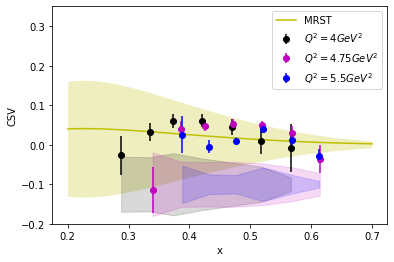

In [9]:
fig, ax = plt.subplots()
ax.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'y',alpha=.25, linewidth=0)
ax.plot(x_axis,y_delta_dv-y_delta_uv,label = 'MRST',color = 'y')

plt.errorbar(xs_one,CSV_one,CSV_one_stat,fmt = 'o',color = 'k',label = r'$Q^2 = 4GeV^2$')
plt.fill_between(xs_one,-0.1-np.asarray(CSV_one_sys),-0.1+np.asarray(CSV_one_sys),alpha = 0.15,color = 'k')

plt.errorbar(xs_two,CSV_two,CSV_two_stat,fmt = 'o',color = 'm',label = r'$Q^2 = 4.75GeV^2$')
plt.fill_between(xs_two,-0.1-np.asarray(CSV_two_sys),-0.1+np.asarray(CSV_two_sys),alpha = 0.15,color = 'm')

plt.errorbar(xs_three,CSV_three,CSV_three_stat,fmt = 'o',color = 'b',label = r'$Q^2 = 5.5GeV^2$')
plt.fill_between(xs_three,-0.1-np.asarray(CSV_three_sys),-0.1+np.asarray(CSV_three_sys),alpha = 0.15,color = 'b')

plt.xlabel('x')
plt.ylabel('CSV')
plt.ylim(-0.2,0.35)
plt.legend()
#plt.legend(title = 'sys err from all')
plt.savefig('results/CSV_sys_err_from_all.pdf')
#plt.savefig('results/CSV_sys_err_from_PDFs.pdf')
#plt.legend(title = 'sys err from FFs')
#plt.savefig('results/CSV_sys_err_from_FFs.pdf')